<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/fashion_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
class ANN():
  def __init__(self, size):
    self.size = size
    
  def fitt(self, Xtrain, Ytrain, Xtest, Ytest):
    
    N,D = Xtrain.shape
    K = len(set(Ytrain))
    
    model = Sequential()
    
    model.add(Dense(units=self.size, input_dim=D))
    model.add(Activation('relu'))
    model.add(Dense(units=K))
    model.add(Activation('softmax'))
    
    model.compile(
    loss = 'sparse_categorical_crossentropy',   # If your targets are integers & not (one-hot encoded), use sparse_categorical_crossentropy
    optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0, amsgrad=False),
    metrics=['accuracy']
    )
    
    r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=15, batch_size=32, verbose=0)
    
    print(r.history.keys())
    
    plt.plot(r.history['loss'], label='Training cost')
    plt.plot(r.history['val_loss'], label='Test cost')
    plt.legend()
    plt.show()
    
    
    plt.plot(r.history['acc'], label='Training accuracy')
    plt.plot(r.history['val_acc'], label='Test accuracy')
    plt.legend()
    plt.show()

In [0]:
def main():
  from google.colab import drive
  drive.mount('/content/gdrive')
  
  df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_train.csv')
  df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_test.csv')
  
  #print(df_train.dtypes)
  #print(df_train.columns)
  #print(df_train.info())
  #print(df_train.head())
  #print(df_train.head)
  
  data_train = df_train.values
  data_test = df_test.values
  
  Xtrain = data_train[:,1:]
  Ytrain = data_train[:,0]
  
  Xtest = data_test[:,1:]
  Ytest = data_test[:,0]
  
    # Normalization
  Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std(axis=0)
  Xtest = (Xtest - Xtest.mean(axis=0)) / Xtest.std(axis=0)
  
  model = ANN(128)
  model.fitt(Xtrain, Ytrain, Xtest, Ytest)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


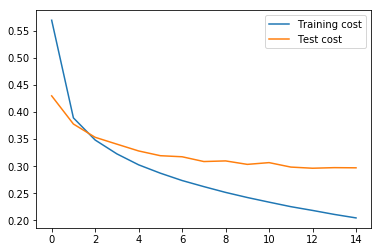

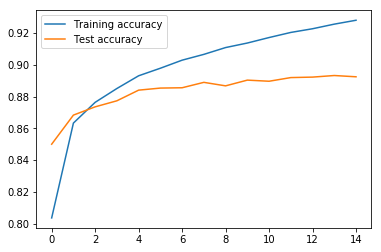

In [88]:
if __name__ == '__main__':
  main()